<a href="https://colab.research.google.com/github/asif428/Leptoquark-/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
from google.colab import files
files.upload()


Saving dataset_train.txt to dataset_train.txt


In [3]:
dataset = pd.read_csv('dataset_train.txt', skipinitialspace=True)
dataset

,EvtNo,ID,Shift,Sigma,Time,Time0,Time1,Time2,Time3,Time4,Time5,Time6,Time7,Time8,Time9,Time10,Time11,Time12,Time13,Time14
0,0,0,0.000749,1,5,0.001115,0.000798,0.000261,-0.000152,0.000113,0.000791,0.000960,0.000206,-0.000914,-0.001606,-0.001591,-0.001096,-0.000396,0.000398,0.001113
1,0,0,0.000766,1,6,0.000781,0.000244,-0.000169,0.000095,0.000774,0.000942,0.000189,-0.000932,-0.001623,-0.001608,-0.001113,-0.000413,0.000381,0.001096,0.001355
2,0,0,0.000785,1,7,0.000225,-0.000188,0.000077,0.000755,0.000924,0.000170,-0.000950,-0.001642,-0.001627,-0.001131,-0.000432,0.000362,0.001077,0.001336,0.001044
3,0,0,0.001585,1,13,-0.001750,-0.002442,-0.002426,-0.001931,-0.001231,-0.000437,0.000278,0.000537,0.000245,0.000108,0.000941,0.002315,0.002802,0.001968,0.001024
4,0,0,0.001756,1,14,-0.002614,-0.002598,-0.002103,-0.001403,-0.000609,0.000106,0.000365,0.000073,-0.000064,0.000769,0.002143,0.002630,0.001796,0.000852,0.000658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2586929,4999,0,0.001989,1,1004,-0.000597,0.000508,0.000888,0.000574,0.000622,0.001112,0.001038,0.000077,-0.000815,-0.000812,-0.000306,-0.000194,-0.000629,-0.000924,-0.000543
2586930,4999,0,0.002037,1,1005,0.000461,0.000840,0.000526,0.000574,0.001064,0.000990,0.000029,-0.000863,-0.000860,-0.000353,-0.000242,-0.000677,-0.000972,-0.000591,0.000074
2586931,4999,0,0.001654,1,1009,0.001446,0.001373,0.000412,-0.000481,-0.000477,0.000029,0.000141,-0.000294,-0.000589,-0.000208,0.000457,0.000493,-0.000336,-0.001108,-0.000859
2586932,4999,0,0.001561,1,1010,0.001466,0.000505,-0.000388,-0.000385,0.000122,0.000234,-0.000201,-0.000496,-0.000115,0.000550,0.000585,-0.000244,-0.001015,-0.000766,0.000149


In [4]:
from sklearn.model_selection import train_test_split
import numpy as np

In [5]:
ntime = 15
ntime

15

In [7]:
ndim = 1
ndim

1

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

ntime = 15
ndim = 1

# Load the dataset
dataset = pd.read_csv('dataset_train.txt', skipinitialspace=True)

# STEP 1: Drop rows that have NaN in any of the Time columns
time_columns = [f'Time{i}' for i in range(ntime)]
dataset = dataset.dropna(subset=time_columns).reset_index(drop=True)

# STEP 2: Extract features and labels from cleaned dataset
dataset_feature = dataset.loc[:, 'Time0':'Time14'].values
dataset_label = dataset['ID'].values

# Sanity check
print(f"dataset_feature shape = {dataset_feature.shape}")
print(f"dataset_label shape   = {dataset_label.shape}")

# STEP 3: Balance the signal and background
sig_idx = np.where(dataset_label == 1)[0]
bkg_idx = np.where(dataset_label == 0)[0]

num_sig = len(sig_idx)
num_bkg = len(bkg_idx)

print(f"num_sig = {num_sig}, num_bkg = {num_bkg}")

# Randomly sample background to match signal
bkg_idx_sampled = np.random.choice(bkg_idx, size=num_sig, replace=False)

# Combine and shuffle
tot_idx = np.concatenate([sig_idx, bkg_idx_sampled])
np.random.shuffle(tot_idx)

# Apply balanced indexing
dataset_feature = dataset_feature[tot_idx]
dataset_label = dataset_label[tot_idx]

# STEP 4: Reshape for LSTM
dataset_feature = dataset_feature.reshape(dataset_feature.shape[0], ntime, ndim)

# STEP 5: Train/Val split
X_train, X_val, y_train, y_val = train_test_split(dataset_feature, dataset_label, test_size=0.33, random_state=10)

# Confirm
print(f"X_train shape = {X_train.shape}")
print(f"X_val shape   = {X_val.shape}")


dataset_feature shape = (2586934, 15)
dataset_label shape   = (2586934,)
num_sig = 134615, num_bkg = 2452319
X_train shape = (180384, 15, 1)
X_val shape   = (88846, 15, 1)


In [35]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Reshape, Flatten

# Generate model

# Define model
model = Sequential()
#model.add(Reshape((ntime, ndim), input_shape = (ntime*ndim, )))
model.add(LSTM(32, return_sequences = True, input_shape = (ntime, ndim, )))
#model.add(LSTM(32, return_sequences = True))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Set loss and optimizer
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop', metrics=['acc'])

# Store model to file
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 15, 32)         │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 480)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        30,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,201 (137.50 KB)

 Trainable params: 35,201 (137.50 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64, verbose=1, validation_data=(X_val, y_val))
history_dict = history.history
model.save('peak_classification.h5')

Epoch 1/10
2819/2819 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - acc: 0.9240 - loss: 0.1862 - val_acc: 0.9234 - val_loss: 0.1922
Epoch 2/10
2819/2819 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - acc: 0.9282 - loss: 0.1769 - val_acc: 0.9303 - val_loss: 0.1733
Epoch 3/10
2819/2819 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - acc: 0.9306 - loss: 0.1709 - val_acc: 0.9327 - val_loss: 0.1652
Epoch 4/10
2819/2819 ━━━━━━━━━━━━━━━━━━━━ 40s 7ms/step - acc: 0.9339 - loss: 0.1636 - val_acc: 0.9358 - val_loss: 0.1608
Epoch 5/10
2819/2819 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - acc: 0.9370 - loss: 0.1565 - val_acc: 0.9353 - val_loss: 0.1634
Epoch 6/10
2819/2819 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - acc: 0.9387 - loss: 0.1526 - val_acc: 0.9404 - val_loss: 0.1500
Epoch 7/10
2819/2819 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - acc: 0.9411 - loss: 0.1476 - val_acc: 0.9415 - val_loss: 0.1489
Epoch 8/10
2819/2819 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - acc: 0.9426 - loss: 0.1433 - val_acc: 0.9408 - val_loss: 0.1448
Epoch 9/10
2819/2819 ━━━━━━━━━━━

In [51]:
import matplotlib.pyplot as plt

def draw_waveform(index):
    ntime = 15  # total time steps
    try:
        waveform = dataset.loc[index, [f'Time{i}' for i in range(ntime)]].values

        plt.figure(figsize=(6, 3))
        plt.plot(range(ntime), waveform, marker='o')
        plt.title(f'Waveform #{index} (Label: {dataset.loc[index, "ID"]})')
        plt.xlabel("Time Step")
        plt.ylabel("Amplitude")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    except IndexError:
        print(f"Index {index} is out of range.")



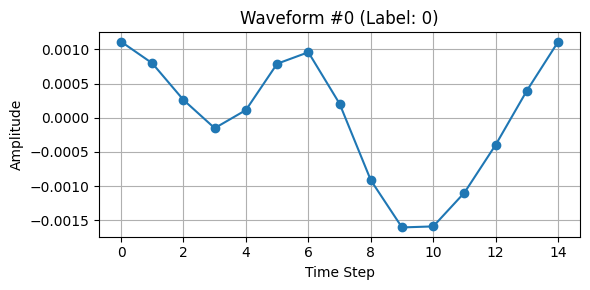

In [53]:
draw_waveform(0)

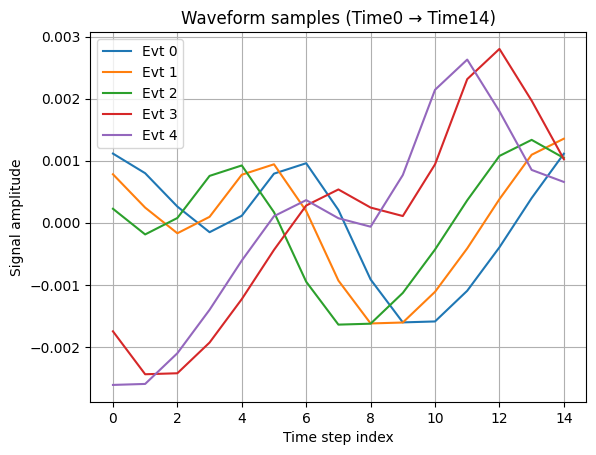

In [52]:
# Visualize multiple samples
for i in range(5):
    plt.plot(range(15), dataset.loc[i, 'Time0':'Time14'].values, label=f"Evt {i}")

plt.xlabel("Time step index")
plt.ylabel("Signal amplitude")
plt.title("Waveform samples (Time0 → Time14)")
plt.legend()
plt.grid(True)
plt.show()


In [55]:
import matplotlib.pyplot as plt

def draw_waveforms(start_index=0, count=6):
    ntime = 15
    fig, axs = plt.subplots(2, 3, figsize=(15, 6))  # 2 rows × 3 columns
    axs = axs.flatten()

    for i in range(count):
        idx = start_index + i
        try:
            waveform = dataset.loc[idx, [f'Time{t}' for t in range(ntime)]].values
            label = dataset.loc[idx, "ID"]

            axs[i].plot(range(ntime), waveform, marker='o')
            axs[i].set_title(f"Index: {idx} | Label: {label}")
            axs[i].set_xlabel("Time Step")
            axs[i].set_ylabel("Amplitude")
            axs[i].grid(True)

        except IndexError:
            axs[i].set_visible(False)  # Hide plot if index out of range

    plt.tight_layout()
    plt.show()


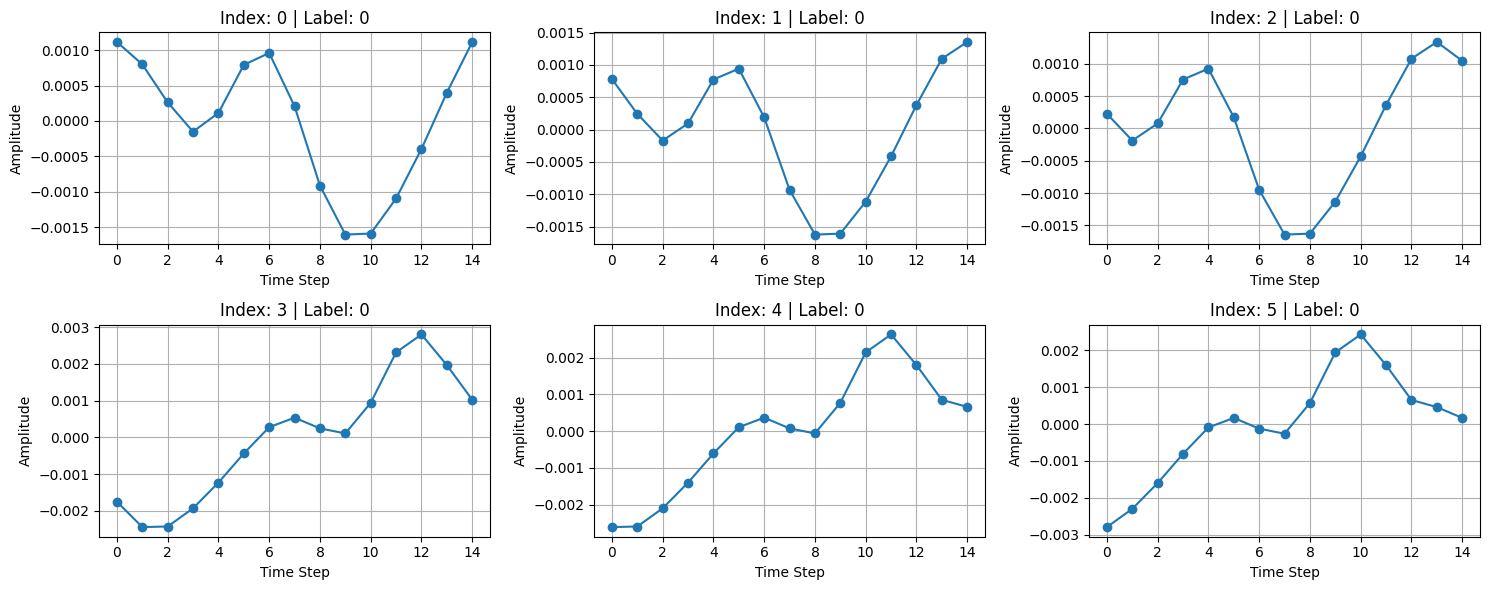

In [56]:
draw_waveforms(0)